In [ ]:
import pandas as pd

df = pd.read_csv('cleaned_dataset.csv')
print(df.columns)
print(df.dtypes)
unique_values = df['property_subtype'].unique()
print(unique_values)
non_numeric_rows = df[~df['postal_code'].str.isnumeric()]
df = df[~df['house_index'].isin([5356, 19838])]

df['postal_code'] = df['postal_code'].astype('int64')
bins = [0, 10000, 50000, 100000, float('inf')]  # Define ranges
labels = ['cheap', 'moderate', 'expensive', 'luxury']  # Define labels


df['province'] = 'undefined'

for index, row in df.iterrows():
    if 1000 < row['postal_code'] <= 1299:
        df.at[index, 'province'] = 'Brussels'
    if 1300 < row['postal_code'] <= 1499:
        df.at[index, 'province'] = 'Walloon Brabant'
    if 1500 < row['postal_code'] <= 1999:
        df.at[index, 'province'] = 'Flemish Brabant'
    if 2000 < row['postal_code'] <= 2999:
        df.at[index, 'province'] = 'Antwerp'
    if 3000 < row['postal_code'] <= 3499:
        df.at[index, 'province'] = 'Flemish Brabant'
    if 3500 < row['postal_code'] <= 3999:
        df.at[index, 'province'] = 'Limburg'
    if 4000 < row['postal_code'] <= 4999:
        df.at[index, 'province'] = 'Liege'
    if 5000 < row['postal_code'] <= 5999:
        df.at[index, 'province'] = 'Namur'

print(df)





Index(['house_index', 'bedrooms', 'property_type', 'property_subtype',
       'locality', 'postal_code', 'street', 'number', 'box', 'kitchen',
       'facades', 'price', 'furnished', 'terrace', 'terraceSurface',
       'fireplace', 'fireplaceCount', 'buildingState', 'garden',
       'gardenSurface', 'pool', 'landSurface', 'livingArea',
       'surfaceOfThePlot', 'typeOfSale'],
      dtype='object')
house_index           int64
bedrooms              int64
property_type        object
property_subtype     object
locality             object
postal_code          object
street               object
number               object
box                  object
kitchen               int64
facades             float64
price               float64
furnished             int64
terrace               int64
terraceSurface      float64
fireplace             int64
fireplaceCount        int64
buildingState        object
garden                int64
gardenSurface         int64
pool                  int64
landSurfac

In [67]:
df['HOUSE'] = (df['property_type'] == 'HOUSE').astype(int)
df['APARTMENT'] = (df['property_type'] == 'APARTMENT').astype(int)

df['APARTMENT_BLOCK'] = (df['property_subtype'] == 'APARTMENT_BLOCK').astype(int)
df['GROUND_FLOOR'] = (df['property_subtype'] == 'GROUND_FLOOR').astype(int)
df['COUNTRY_COTTAGE'] = (df['property_subtype'] == 'COUNTRY_COTTAGE').astype(int)
df['MANSION'] = (df['property_subtype'] == 'MANSION').astype(int)
df['PENTHOUSE'] = (df['property_subtype'] == 'PENTHOUSE').astype(int)
df['EXCEPTIONAL_PROPERTY'] = (df['property_subtype'] == 'EXCEPTIONAL_PROPERTY').astype(int)
df['KOT'] = (df['property_subtype'] == 'KOT').astype(int)
df['LOFT'] = (df['property_subtype'] == 'LOFT').astype(int)
df['MANOR_HOUSE'] = (df['property_subtype'] == 'MANOR_HOUSE').astype(int)
df['SERVICE_FLAT'] = (df['property_subtype'] == 'SERVICE_FLAT').astype(int)
df['CHALET'] = (df['property_subtype'] == 'CHALET').astype(int)


df['AS_NEW'] = (df['buildingState'] == 'AS_NEW').astype(int)
df['GOOD'] = (df['buildingState'] == 'GOOD').astype(int)
df['JUST_RENOVATED'] = (df['buildingState'] == 'JUST_RENOVATED').astype(int)
df['TO_BE_DONE_UP'] = (df['buildingState'] == 'TO_BE_DONE_UP').astype(int)
df['TO_RENOVATE'] = (df['buildingState'] == 'TO_RENOVATE').astype(int)
df['TO_RESTORE'] = (df['buildingState'] == 'TO_RESTORE').astype(int)



df_numeric = df.select_dtypes(include=['float64', 'int64']) 

correlation_matrix = df_numeric.corr()
print(correlation_matrix['price'].sort_values(ascending=False))
#print(df[['bedrooms', 'HOUSE', 'postal_code','APARTMENT']])



price                   1.000000
livingArea              0.434224
surfaceOfThePlot        0.345216
landSurface             0.345216
bedrooms                0.344203
pool                    0.245355
facades                 0.206042
AS_NEW                  0.178521
EXCEPTIONAL_PROPERTY    0.117700
fireplace               0.109411
HOUSE                   0.103559
house_index             0.098941
gardenSurface           0.078730
terraceSurface          0.073806
PENTHOUSE               0.059093
terrace                 0.057193
APARTMENT_BLOCK         0.055346
COUNTRY_COTTAGE         0.054641
MANOR_HOUSE             0.048812
postal_code             0.032950
JUST_RENOVATED          0.032287
garden                  0.031216
MANSION                 0.016975
LOFT                    0.013539
furnished               0.003538
fireplaceCount          0.003210
TO_RESTORE             -0.017266
CHALET                 -0.022325
kitchen                -0.030797
KOT                    -0.032557
SERVICE_FL

In [48]:
df['HOUSE'] = (df['property_type'] == 'HOUSE').astype(int)
df['APARTMENT'] = (df['property_type'] == 'APARTMENT').astype(int)

df['APARTMENT_BLOCK'] = (df['property_subtype'] == 'APARTMENT_BLOCK').astype(int)
df['GROUND_FLOOR'] = (df['property_subtype'] == 'GROUND_FLOOR').astype(int)
df['COUNTRY_COTTAGE'] = (df['property_subtype'] == 'COUNTRY_COTTAGE').astype(int)
df['MANSION'] = (df['property_subtype'] == 'MANSION').astype(int)
df['PENTHOUSE'] = (df['property_subtype'] == 'PENTHOUSE').astype(int)
df['EXCEPTIONAL_PROPERTY'] = (df['property_subtype'] == 'EXCEPTIONAL_PROPERTY').astype(int)
df['KOT'] = (df['property_subtype'] == 'KOT').astype(int)
df['LOFT'] = (df['property_subtype'] == 'LOFT').astype(int)
df['MANOR_HOUSE'] = (df['property_subtype'] == 'MANOR_HOUSE').astype(int)
df['SERVICE_FLAT'] = (df['property_subtype'] == 'SERVICE_FLAT').astype(int)
df['CHALET'] = (df['property_subtype'] == 'CHALET').astype(int)


df['AS_NEW'] = (df['buildingState'] == 'AS_NEW').astype(int)
df['GOOD'] = (df['buildingState'] == 'GOOD').astype(int)
df['JUST_RENOVATED'] = (df['buildingState'] == 'JUST_RENOVATED').astype(int)
df['TO_BE_DONE_UP'] = (df['buildingState'] == 'TO_BE_DONE_UP').astype(int)
df['TO_RENOVATE'] = (df['buildingState'] == 'TO_RENOVATE').astype(int)
df['TO_RESTORE'] = (df['buildingState'] == 'TO_RESTORE').astype(int)



#df_numeric = df.select_dtypes(include=['float64', 'int64']) 

#correlation_matrix = df_numeric.corr()
#print(correlation_matrix['price'].sort_values(ascending=False))
print(df[['bedrooms', 'HOUSE', 'postal_code','APARTMENT']])



       bedrooms  HOUSE postal_code  APARTMENT
0             2      0        3000          1
1             3      1        9950          0
2             1      0        2140          1
3             5      1        6838          0
4             2      1        4460          0
...         ...    ...         ...        ...
16108         3      1        2230          0
16109         4      1        8800          0
16110         0      1        8020          0
16111         3      1        8870          0
16112         3      1        1950          0

[16113 rows x 4 columns]


In [58]:
#print(df['landSurface'].value_counts())
print('missing land',df['landSurface'].isnull().sum())
print('missing subtype',df['property_subtype'].isnull().sum())
print('missing bedrooms',df['bedrooms'].isnull().sum())
print('missing garden',df['garden'].isnull().sum())
print('missing buldingstate',df['buildingState'].isnull().sum())
print('missing land',df['landSurface'].isnull().sum())
print('missing land',df['landSurface'].isnull().sum())

missing land 7155
missing subtype 0
missing bedrooms 0
missing garden 0
missing buldingstate 2723
missing land 7155
missing land 7155


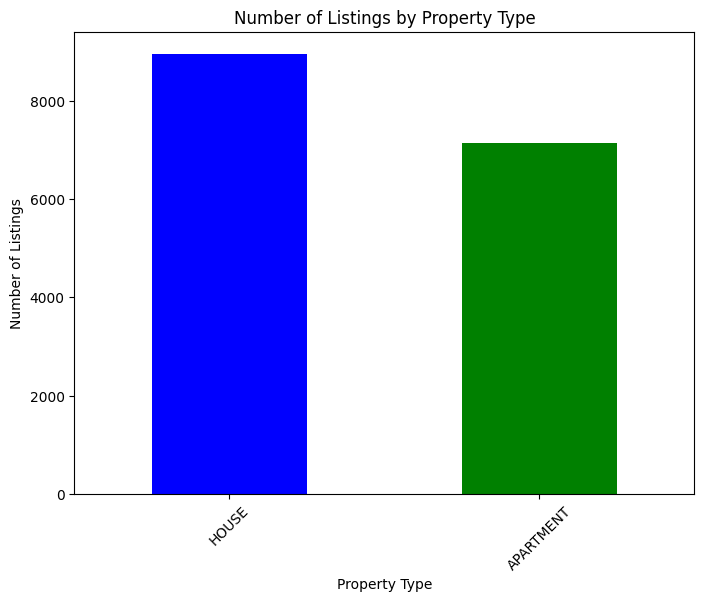

Index(['house_index', 'bedrooms', 'property_type', 'property_subtype',
       'locality', 'postal_code', 'street', 'number', 'box', 'kitchen',
       'facades', 'price', 'furnished', 'terrace', 'terraceSurface',
       'fireplace', 'fireplaceCount', 'buildingState', 'garden',
       'gardenSurface', 'pool', 'landSurface', 'livingArea',
       'surfaceOfThePlot', 'typeOfSale'],
      dtype='object')


In [6]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('cleaned_dataset.csv')

# Count the number of occurrences for each unique value in the 'Type' column
type_counts = df['property_type'].value_counts()

# Create a list of colors (one for each bar)
colors = ['blue', 'green', 'red', 'purple', 'orange']  # Add more colors if needed

# Plot the counts as a bar chart with the specified colors
type_counts.plot(kind='bar', color=colors[:len(type_counts)], figsize=(8, 6))

# Add labels and title
plt.xlabel('Property Type')
plt.ylabel('Number of Listings')
plt.title('Number of Listings by Property Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

print(df.columns)



In [ ]:
# Extract only the numeric part of the postcode (if it has letters)
df['postal_code'] = df['postal_code'].str.extract('(\d+)').astype(int)




In [11]:
import geopandas as gpd

# Load your shapefile
gdf = gpd.read_file("postaldistricts.shp")

# Check the columns of the shapefile
print(gdf.columns)

# Check the first few rows of the shapefile to see if there is a 'postcode' column
print(gdf.head(200))


Index(['Join_Count', 'nouveau_PO', 'FREQUENCY', 'CP_speciau', 'Shape_Leng',
       'Shape_Area', 'geometry'],
      dtype='object')
     Join_Count nouveau_PO  FREQUENCY  CP_speciau    Shape_Leng    Shape_Area  \
0             1       5012          2           1    977.714223  3.838034e+04   
1             1       5012          2           1    123.021423  8.601421e+02   
2             1       5589          1           1   1197.205234  6.306885e+04   
3          1094       5560          2           0  54736.127330  5.406061e+07   
4          1357       5370          1           0  74754.001683  8.154068e+07   
..          ...        ...        ...         ...           ...           ...   
195        2659       8434          1           0  13681.320595  9.358759e+06   
196        5480       8450          1           0  20166.806098  1.425207e+07   
197        3490       8460          1           0  37352.352301  3.562144e+07   
198        4484       8470          1           0  37156.7

In [ ]:
import geopandas as gpd
import pandas as pd

# Load the DataFrame (df) and GeoDataFrame (gdf)
df = pd.read_csv("cleaned_dataset.csv")  # Replace with your actual dataset file
gdf = gpd.read_file("postaldistricts.shp")  # Replace with your actual shapefile

# Check data types for 'postal_code' in df and 'nouveau_PO' in gdf
print(df['postal_code'].dtype)  # Check type in df
print(gdf['nouveau_PO'].dtype)  # Check type in gdf

# If they are not the same, convert them to the same type
# Option 1: Convert both to string (recommended for postcodes, which may include leading zeros)
df['postal_code'] = df['postal_code'].astype(str)
gdf['nouveau_PO'] = gdf['nouveau_PO'].astype(str)

# Option 2: If you need both columns as integers, use the following instead
# df['postal_code'] = df['postal_code'].astype(int)
# gdf['nouveau_PO'] = gdf['nouveau_PO'].astype(int)

# Merge the two DataFrames (GeoDataFrame and DataFrame)
gdf = gdf.merge(df[['postal_code', 'price']], left_on='nouveau_PO', right_on='postal_code', how='left')

# Check the first few rows of the merged GeoDataFrame
print(gdf.head())

# Now you can plot or analyze the merged data
# For example, plotting the average price by postcode
import matplotlib.pyplot as plt

# Calculate the median price
median_price = gdf['price'].median()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the data, coloring based on the price compared to the median
gdf.plot(column='price',  # Color regions based on the 'price' column
         cmap='coolwarm',  # Use a cool colormap
         legend=True,
         legend_kwds={'label': f"Property Price (Median: {median_price:.2f} €)"},
         ax=ax,
         edgecolor='black')

# Add a title
plt.title("Property Prices by Postcode (Relative to Median)", fontsize=16)
plt.axis('off')  # Turn off axes for a cleaner look
plt.show()



object
object
   Join_Count nouveau_PO  FREQUENCY  CP_speciau    Shape_Leng    Shape_Area  \
0           1       5012          2           1    977.714223  3.838034e+04   
1           1       5012          2           1    123.021423  8.601421e+02   
2           1       5589          1           1   1197.205234  6.306885e+04   
3        1094       5560          2           0  54736.127330  5.406061e+07   
4        1357       5370          1           0  74754.001683  8.154068e+07   

                                            geometry postal_code     price  
0  POLYGON Z ((185640.749 128034.551 0, 185693.14...         NaN       NaN  
1  POLYGON Z ((185785.522 128270.324 0, 185777.35...         NaN       NaN  
2  POLYGON Z ((213820.048 94558.92 0, 214146.309 ...         NaN       NaN  
3  POLYGON Z ((191350.123 101346.457 0, 191368.11...        5560   70000.0  
4  POLYGON Z ((210593.768 123259.25 0, 211182.758...        5370  395000.0  


c:\Users\jerem\AppData\Local\Programs\Python\Python313\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


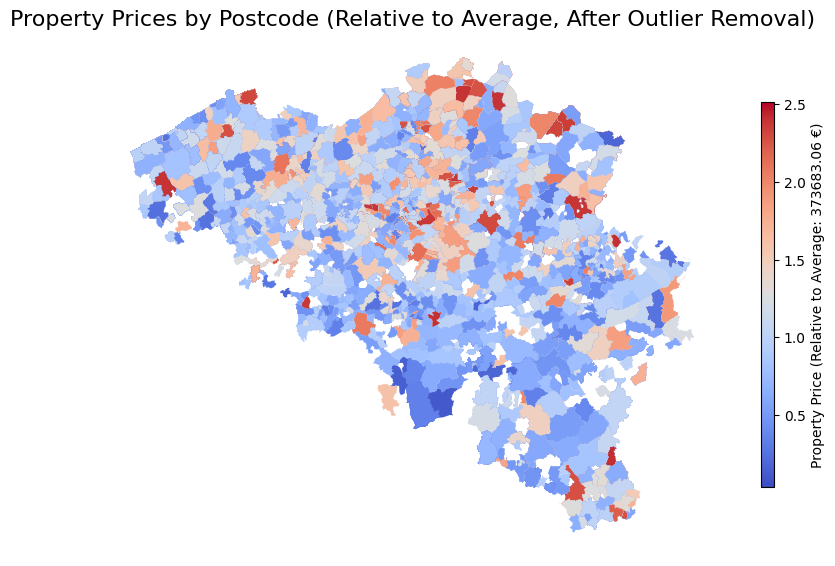

In [69]:
import geopandas as gpd
import pandas as pd

# Load the DataFrame (df) and GeoDataFrame (gdf)
df = pd.read_csv("cleaned_dataset.csv")  # Replace with your actual dataset file
gdf = gpd.read_file("postaldistricts.shp")  # Replace with your actual shapefile

# Check data types for 'postal_code' in df and 'nouveau_PO' in gdf
print(df['postal_code'].dtype)  # Check type in df
print(gdf['nouveau_PO'].dtype)  # Check type in gdf

# If they are not the same, convert them to the same type
# Option 1: Convert both to string (recommended for postcodes, which may include leading zeros)
df['postal_code'] = df['postal_code'].astype(str)
gdf['nouveau_PO'] = gdf['nouveau_PO'].astype(str)

# Option 2: If you need both columns as integers, use the following instead
# df['postal_code'] = df['postal_code'].astype(int)
# gdf['nouveau_PO'] = gdf['nouveau_PO'].astype(int)

# Merge the two DataFrames (GeoDataFrame and DataFrame)
gdf = gdf.merge(df[['postal_code', 'price']], left_on='nouveau_PO', right_on='postal_code', how='left')

# Check the first few rows of the merged GeoDataFrame
print(gdf.head())

# Now you can plot or analyze the merged data
# For example, plotting the average price by postcode
import matplotlib.pyplot as plt


# Calculate the IQR (Interquartile Range)
Q1 = gdf['price'].quantile(0.25)
Q3 = gdf['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
gdf_filtered = gdf[(gdf['price'] >= lower_bound) & (gdf['price'] <= upper_bound)]

# Calculate the average price for the filtered data
average_price_filtered = gdf_filtered['price'].mean()

# Normalize the prices based on the average price after outlier removal
gdf_filtered['price_normalized'] = gdf_filtered['price'] / average_price_filtered

# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

gdf_filtered.plot(column='price_normalized',  # Use the normalized price values
                  cmap='coolwarm',  # Choose a color map
                  legend=True,
                  legend_kwds={
                      'label': f"Property Price (Relative to Average: {average_price_filtered:.2f} €)",
                      'shrink': 0.5,  # Shrinks the height of the color bar (adjust this value)
                      'aspect': 30    # Adjust the width-to-height ratio (higher value = thinner bar)
                  },
                  ax=ax,
                  edgecolor=None)

# Add a title
plt.title("Property Prices by Postcode (Relative to Average, After Outlier Removal)", fontsize=16)
plt.axis('off')  # Turn off axes for a cleaner look
plt.show()



